<a href="https://colab.research.google.com/github/michaelscheinfeild/RegressionPredict/blob/main/SurgeryDurationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surgery Duration Prediction

Assignment abstract
Given a dataset of surgeries, the goal is to create an estimator for the duration of surgeries.

Michael Scheinfeild


Assignment overview

We have a dataset that contains information about different types of surgeries performed at a hospital. The dataset includes the following columns:

* 'Surgery Type': Types include 'C-section', 'Appendectomy', 'Hip replacement', 'Knee
    replacement', and 'Cataract surgery'.
* 'Anesthesia Type': Types include 'General' and 'Local'.
* 'Age': The age of the patient.
* 'BMI': The Body Mass Index of the patient.
* 'DoctorID': The unique ID of the doctor who performed the surgery.
* 'AnaesthetistID': The unique ID of the anesthetist present during the surgery.
* 'Duration in Minutes': The duration of the surgery in minutes.


The 'Duration in Minutes' column is our target variable, and the rest of the columns are our features.

Your task is to build a machine learning model that can accurately predict the 'Duration in Minutes' of surgery given the features.


# Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2

In [6]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
df = pd.read_csv('surgeries to predict.csv')
df.shape

(10000, 8)

In [10]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

In [13]:
df.head()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
0,0,3,1,44,20,853628,178042,149
1,1,0,0,56,27,369199,714022,86
2,2,0,1,45,22,519569,906701,81
3,3,1,0,63,22,230984,454178,177
4,4,1,0,40,35,706850,636647,127


check all data is ok

In [14]:
nan_counts = df.isna().sum()
print(nan_counts)


Unnamed: 0             0
Surgery Type           0
Anesthesia Type        0
Age                    0
BMI                    0
DoctorID               0
AnaesthetistID         0
Duration in Minutes    0
dtype: int64


## Histogram data

In [15]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'Surgery Type', 'Anesthesia Type', 'Age', 'BMI',
       'DoctorID', 'AnaesthetistID', 'Duration in Minutes'],
      dtype='object')


In [16]:
def plothist(df,name):
  plt.figure()
  plt.hist(df[name], bins=10)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.title(name)

In [17]:
namesplot = column_names[1:]

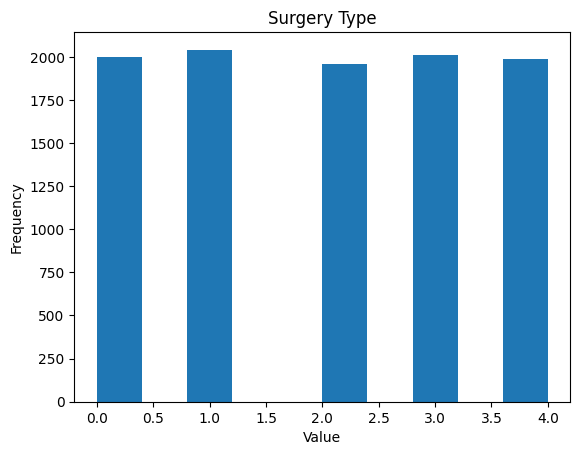

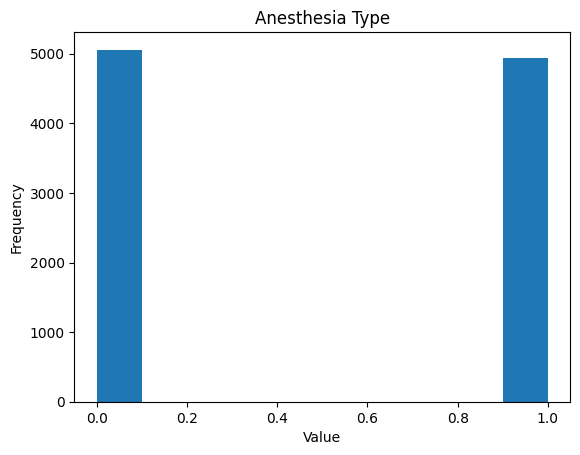

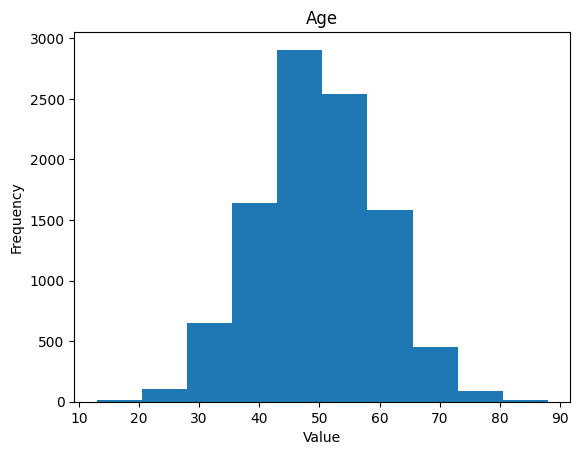

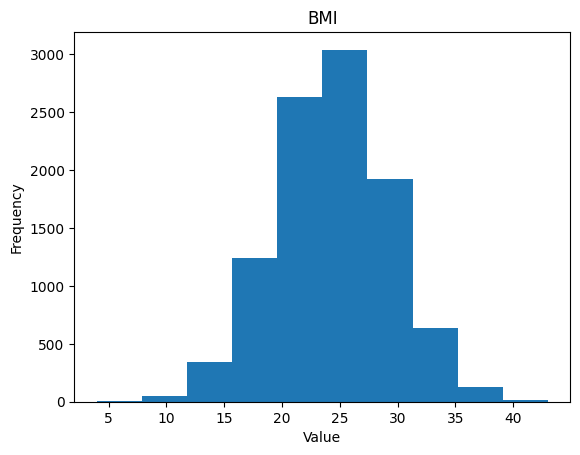

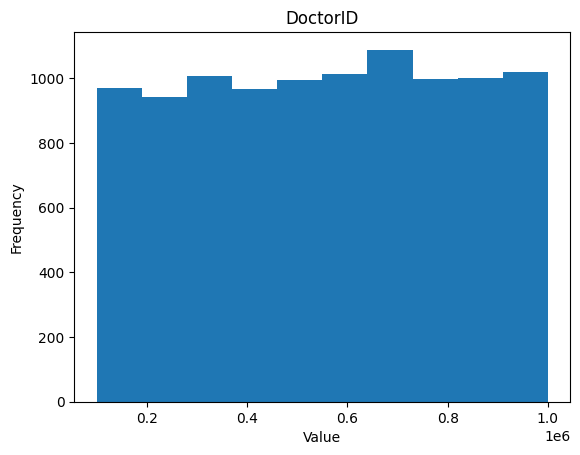

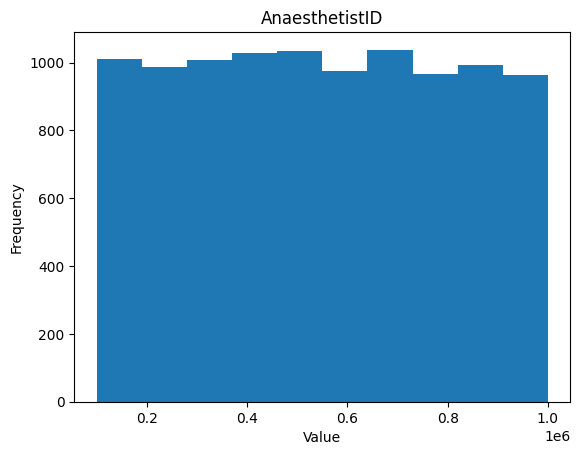

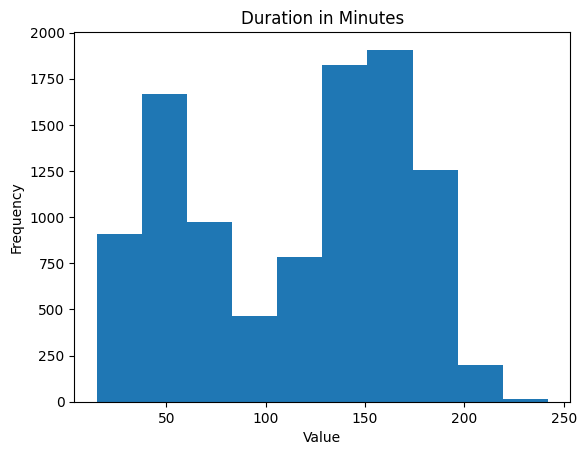

In [18]:
for name in namesplot:
    plothist(df,name)

## Dependecny data

In [19]:
def plotVsFeat(df,name1,name2):
  plt.figure()
  plt.scatter(df[name1], df[name2])
  plt.xlabel(name1)
  plt.ylabel(name2)


In [20]:
namesX = namesplot[:-1]
namesY = namesplot[-1]

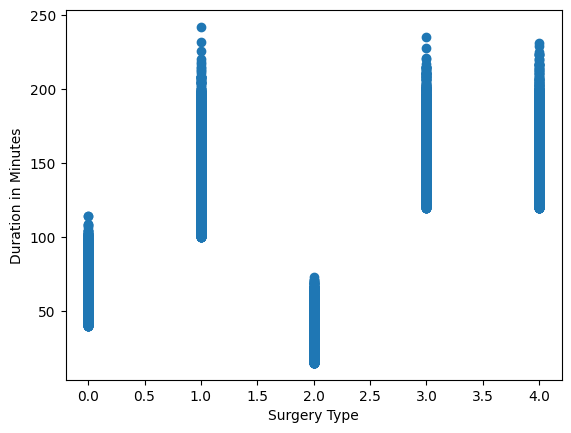

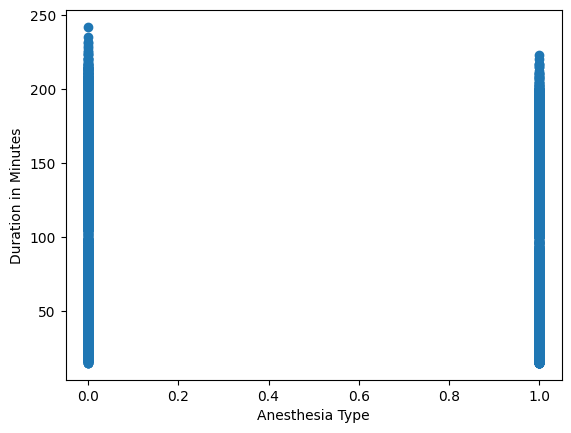

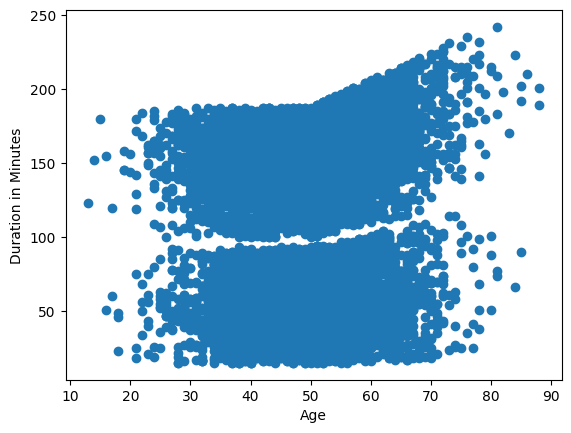

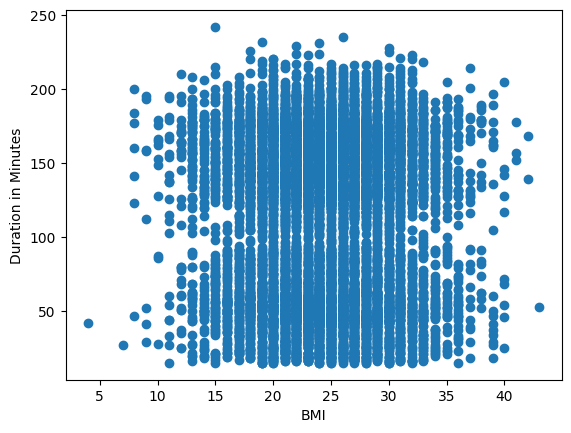

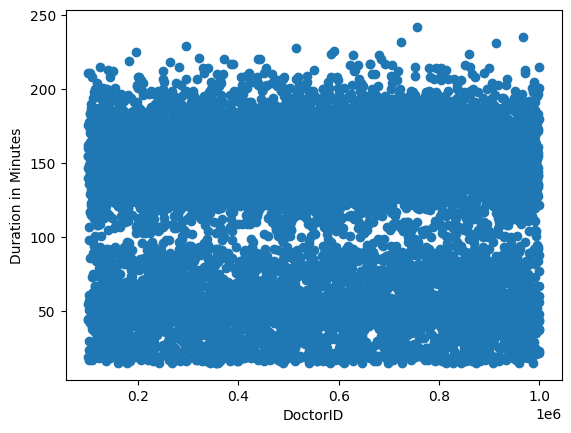

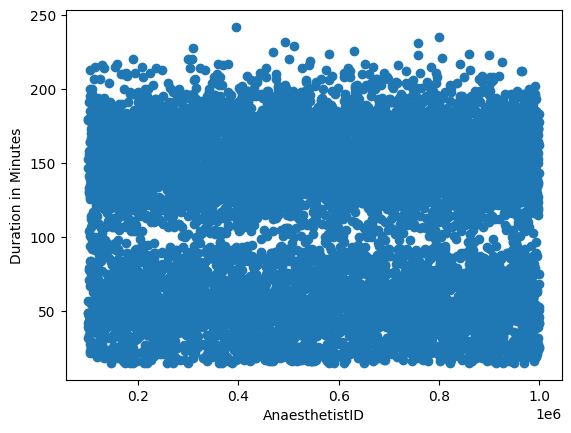

In [21]:
for nx in namesX:
   plotVsFeat(df,nx,namesY)

**Seems relevant features are**
'Surgery Type',
 'Anesthesia Type', 'Age', 'BMI' ?
       

## Statistics plots

https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/

In [22]:
def stat_crosstab(df,name1,name2):
  print(pd.crosstab(df[name1], df[name2],margins=True, margins_name='Total'))


In [23]:
stat_crosstab(df,'Surgery Type','Anesthesia Type')

Anesthesia Type     0     1  Total
Surgery Type                      
0                 999   999   1998
1                1036  1005   2041
2                 985   976   1961
3                1029   981   2010
4                1009   981   1990
Total            5058  4942  10000


In [24]:
def plot_heatmap(df,name1,name2):
  # Create the crosstab with margins
  cross_tab = pd.crosstab(df[name1], df[name2], margins=True, margins_name='Total')

  # Plot the heatmap
  sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, cbar=False)

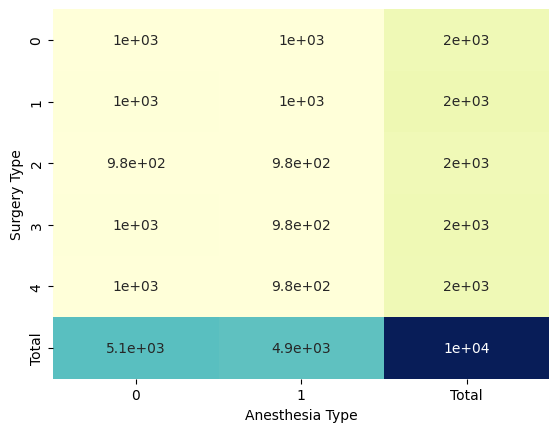

In [25]:
plot_heatmap(df,'Surgery Type', 'Anesthesia Type')

<Axes: xlabel='Surgery Type', ylabel='Anesthesia Type'>

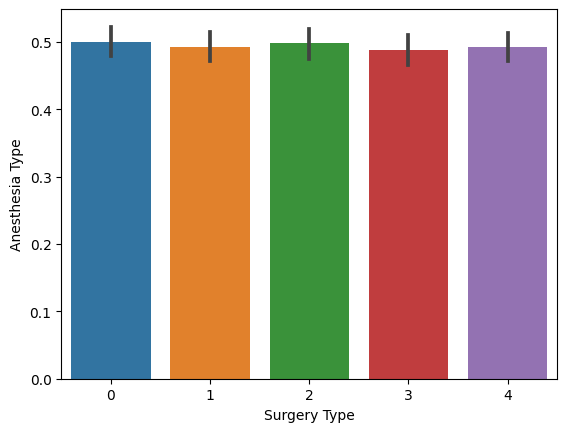

In [ ]:
sns.barplot(x='Surgery Type',y='Anesthesia Type',data=df)

<Axes: xlabel='Surgery Type', ylabel='Age'>

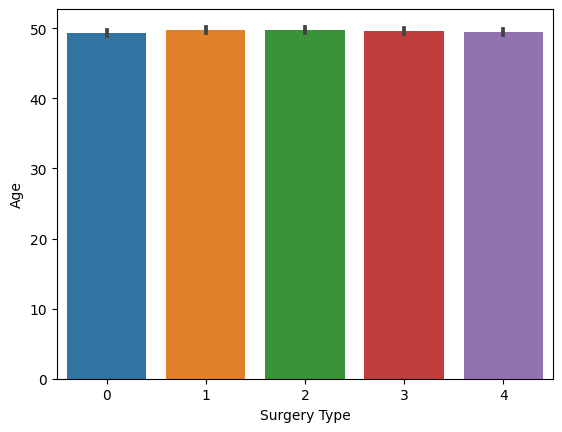

In [ ]:
sns.barplot(x='Surgery Type',y='Age',data=df)

<Axes: xlabel='Surgery Type', ylabel='BMI'>

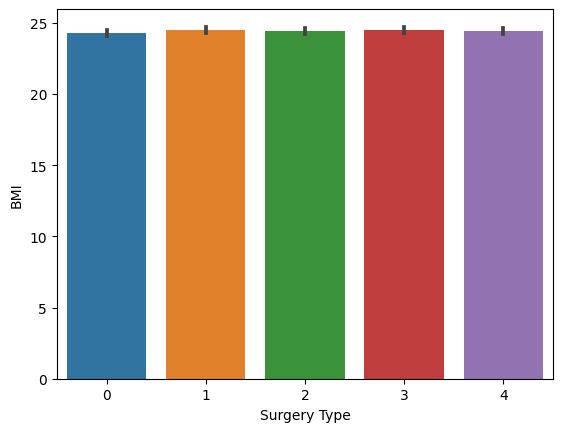

In [ ]:
sns.barplot(x='Surgery Type',y='BMI',data=df)

<Axes: xlabel='Surgery Type', ylabel='Duration in Minutes'>

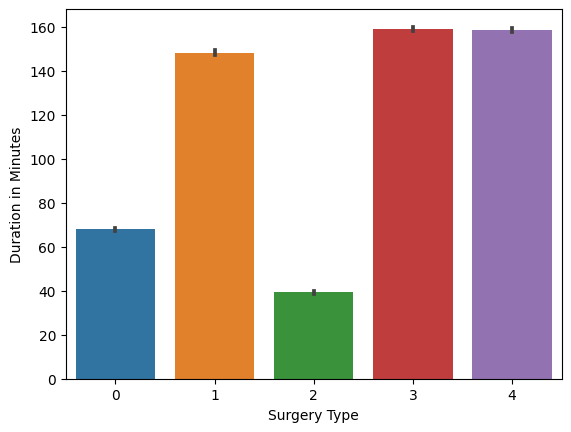

In [ ]:
sns.barplot(x='Surgery Type',y='Duration in Minutes',data=df)

<Axes: xlabel='Anesthesia Type', ylabel='Duration in Minutes'>

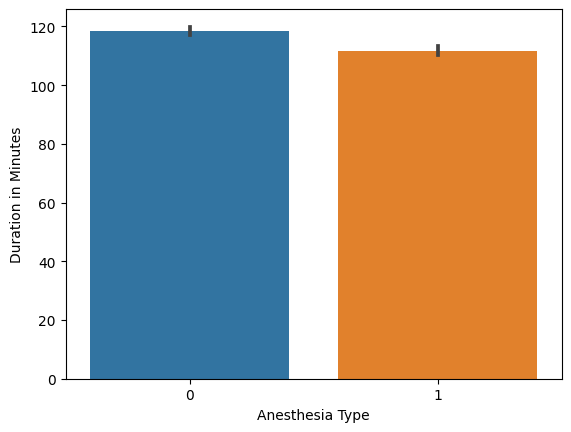

In [ ]:
sns.barplot(x='Anesthesia Type',y='Duration in Minutes',data=df)

<Axes: xlabel='Surgery Type', ylabel='count'>

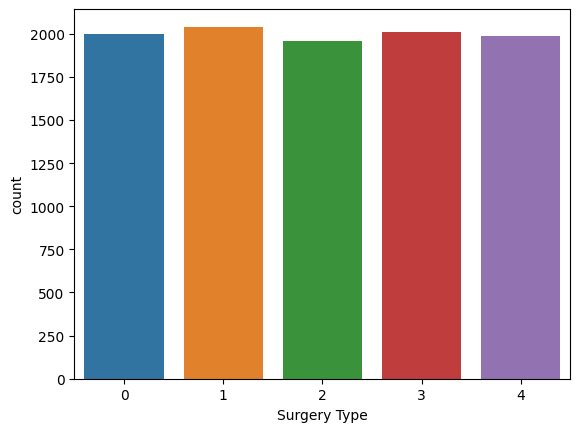

In [ ]:
sns.countplot(x='Surgery Type',data=df)

<Axes: xlabel='Anesthesia Type', ylabel='count'>

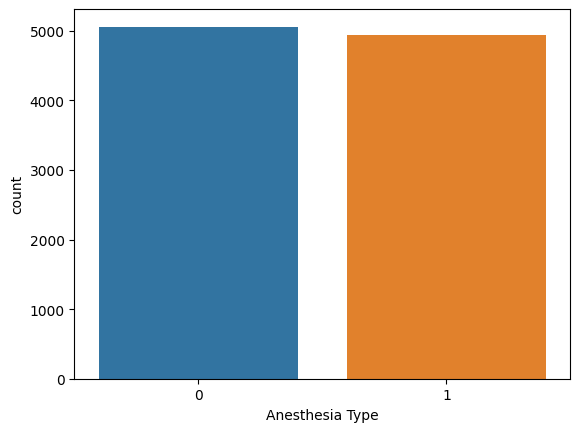

In [ ]:
sns.countplot(x='Anesthesia Type',data=df)

<Axes: xlabel='Surgery Type', ylabel='Duration in Minutes'>

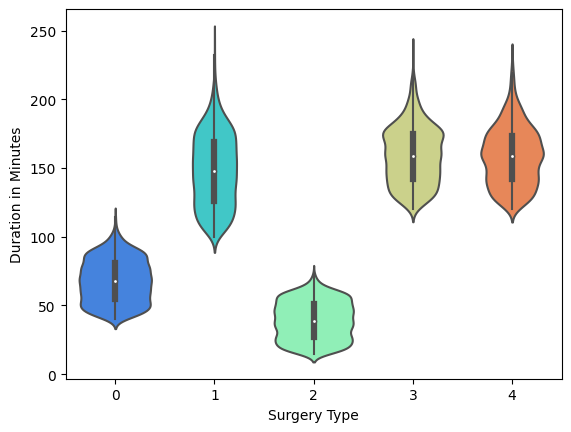

In [26]:
sns.violinplot(x="Surgery Type", y="Duration in Minutes", data=df,palette='rainbow')


<Axes: xlabel='Anesthesia Type', ylabel='Duration in Minutes'>

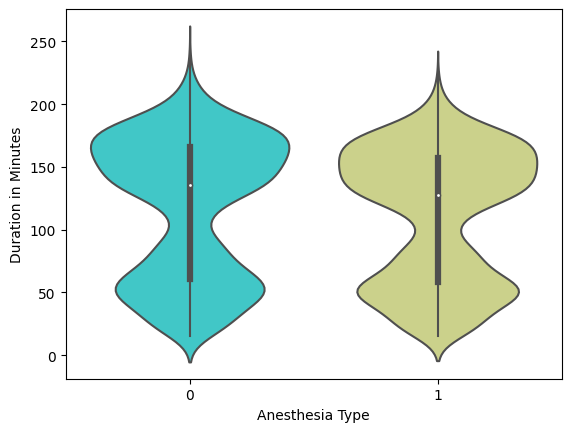

In [27]:
sns.violinplot(x="Anesthesia Type", y="Duration in Minutes", data=df,palette='rainbow')

<Axes: xlabel='BMI', ylabel='Duration in Minutes'>

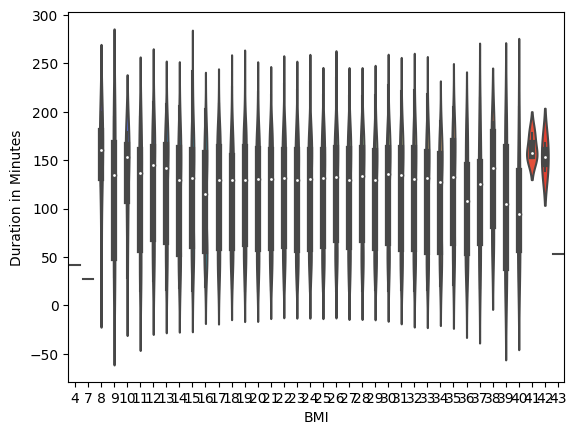

In [29]:
sns.violinplot(x="BMI", y="Duration in Minutes", data=df,palette='rainbow')

bmi has lisstle change on duration

(0.0, 253.35)

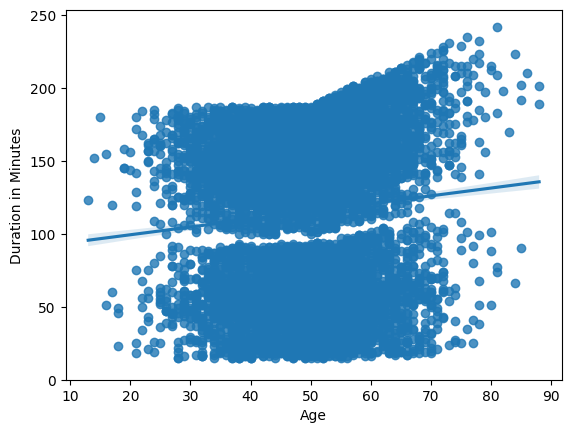

In [28]:
sns.regplot(x='Age',y='Duration in Minutes',data=df)
plt.ylim(0,)

(0.0, 253.35)

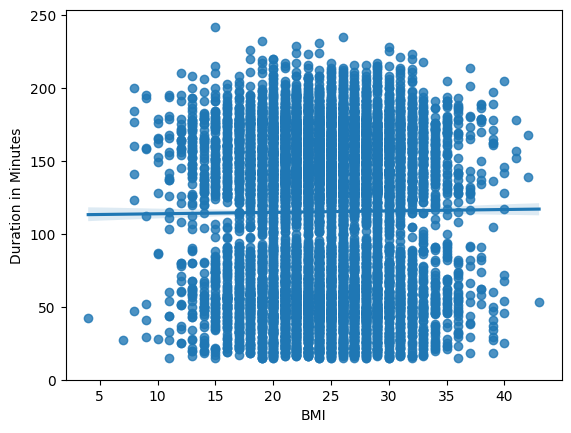

In [ ]:
sns.regplot(x='BMI',y='Duration in Minutes',data=df)
plt.ylim(0,)

## Relevant columns

In [30]:
df.head()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
0,0,3,1,44,20,853628,178042,149
1,1,0,0,56,27,369199,714022,86
2,2,0,1,45,22,519569,906701,81
3,3,1,0,63,22,230984,454178,177
4,4,1,0,40,35,706850,636647,127


In [31]:
dfp=df.iloc[:, 1:]
dfp.head()

,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
0,3,1,44,20,853628,178042,149
1,0,0,56,27,369199,714022,86
2,0,1,45,22,519569,906701,81
3,1,0,63,22,230984,454178,177
4,1,0,40,35,706850,636647,127


In [ ]:
dfp.columns

Index(['Surgery Type', 'Anesthesia Type', 'Age', 'BMI', 'DoctorID',
       'AnaesthetistID', 'Duration in Minutes'],
      dtype='object')

In [32]:
selected_columns = dfp[['Surgery Type', 'Anesthesia Type', 'Age', 'BMI','Duration in Minutes']]

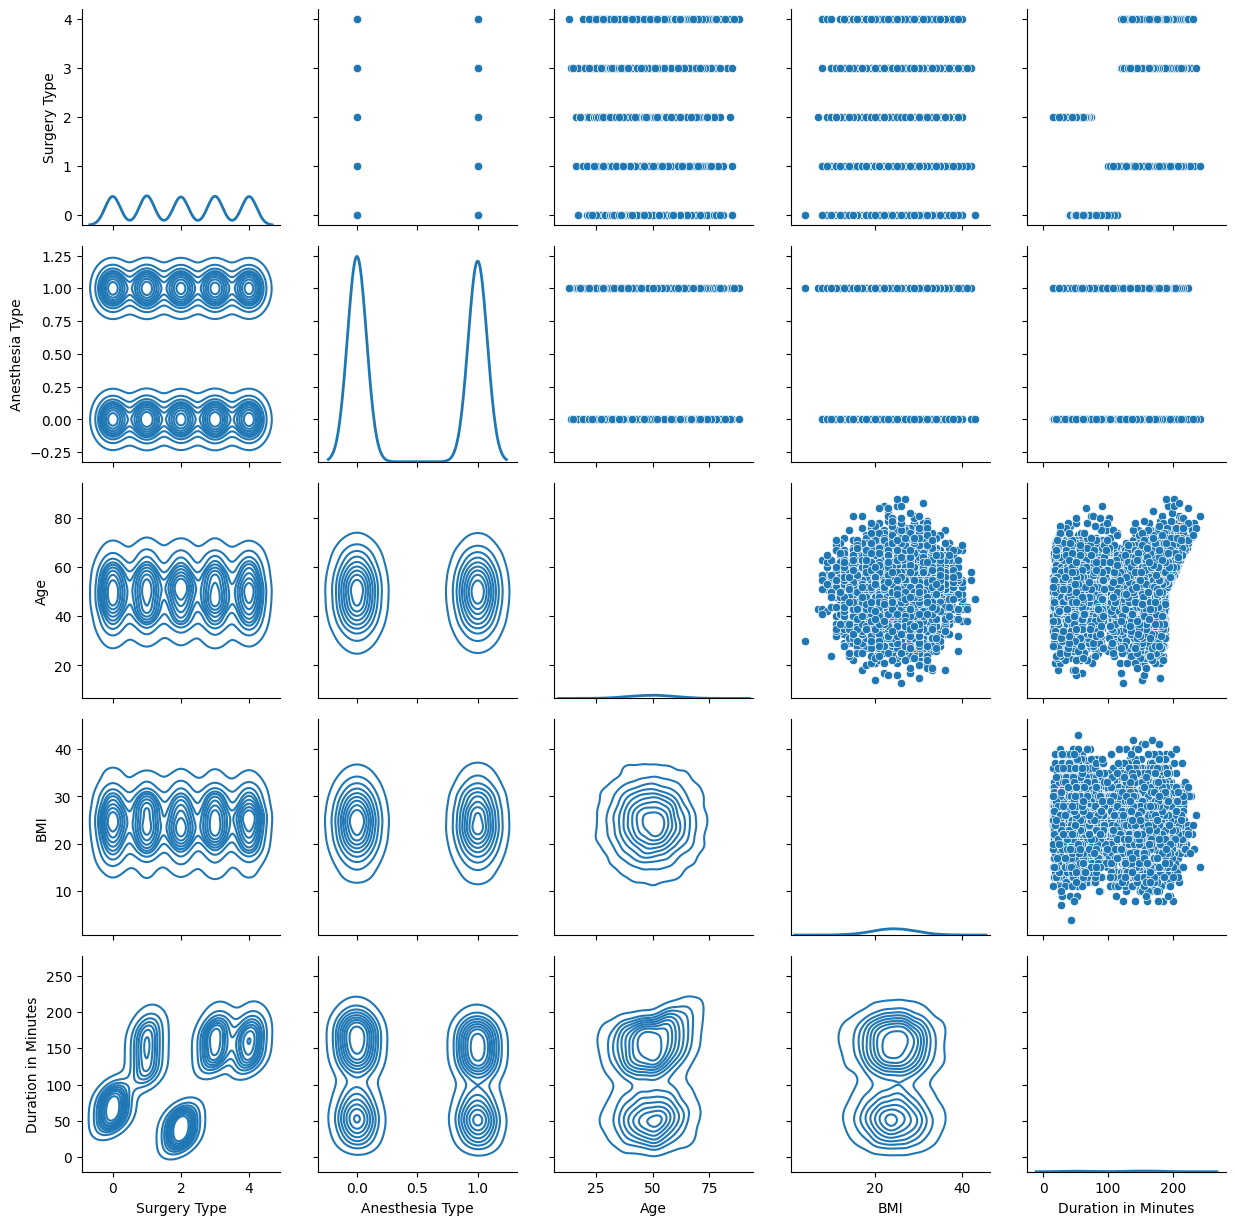

In [33]:
g = sns.PairGrid(selected_columns)

g = g.map_upper(sns.scatterplot)

g = g.map_lower(sns.kdeplot, colors="C0")

g = g.map_diag(sns.kdeplot, lw=2)

In [34]:
namesY

'Duration in Minutes'

# Check Features

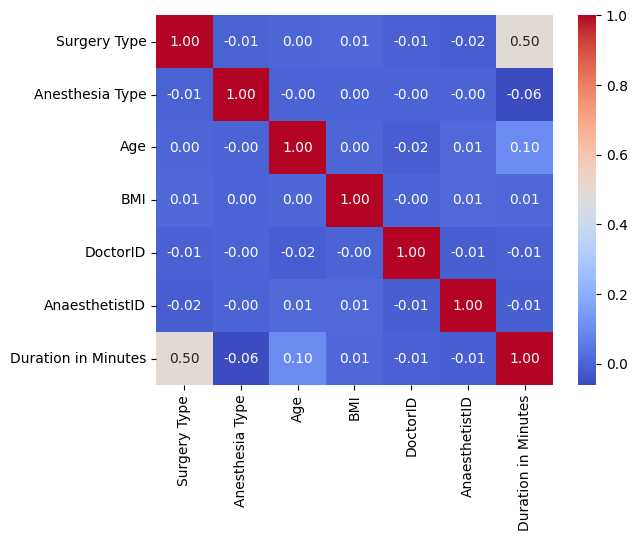

In [35]:
correlation_matrix = dfp.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [36]:
# Assuming correlation_matrix is your correlation matrix DataFrame
threshold = 0.05  # Set your desired threshold

# Select column pairs where the absolute correlation is greater than the threshold
high_correlation_pairs = (
    correlation_matrix.abs() > threshold
) & (correlation_matrix.abs() < 1.0)

# Get the column names with high correlation
high_correlation_columns = [
    col for col in high_correlation_pairs.columns if any(high_correlation_pairs[col])
]

print("Columns with high correlation:", high_correlation_columns)

Columns with high correlation: ['Surgery Type', 'Anesthesia Type', 'Age', 'Duration in Minutes']


# XGBoost classify

## Split Data

In [37]:
selected_cols = ['Surgery Type', 'Anesthesia Type', 'Age','Duration in Minutes']
dfSel = df[selected_cols]

In [38]:
xCols = selected_cols[:-1]
xCols

['Surgery Type', 'Anesthesia Type', 'Age']

In [39]:
yCol = selected_cols[-1]
yCol

'Duration in Minutes'

In [40]:
train_df, test_df = train_test_split(dfSel, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [41]:
print(train_df.shape, val_df.shape,test_df.shape)

(6000, 4) (2000, 4) (2000, 4)


In [42]:
train_df.head()

,Surgery Type,Anesthesia Type,Age,Duration in Minutes
8588,0,0,54,53
3178,1,0,56,191
5200,3,1,48,132
8889,1,0,70,207
5789,0,0,22,68


## Normalize Features

In [43]:
scaler = StandardScaler()

# Fit and transform the scaler on the training data
train_df[xCols] = scaler.fit_transform(train_df[xCols])
val_df[xCols] = scaler.transform(val_df[xCols])
test_df[xCols] = scaler.transform(test_df[xCols])

In [44]:
train_df.head()

,Surgery Type,Anesthesia Type,Age,Duration in Minutes
8588,-1.411920,-0.991371,0.456232,53
3178,-0.704722,-0.991371,0.656598,191
5200,0.709673,1.008705,-0.144864,132
8889,-0.704722,-0.991371,2.059157,207
5789,-1.411920,-0.991371,-2.749617,68


## Estimate Duration using XGBoost

In [45]:
X_train, y_train = train_df[xCols], train_df[yCol]
X_val, y_val = val_df[xCols], val_df[yCol]
X_test, y_test = test_df[xCols], test_df[yCol]

In [46]:
X_train.head()

,Surgery Type,Anesthesia Type,Age
8588,-1.411920,-0.991371,0.456232
3178,-0.704722,-0.991371,0.656598
5200,0.709673,1.008705,-0.144864
8889,-0.704722,-0.991371,2.059157
5789,-1.411920,-0.991371,-2.749617


In [47]:
y_train.head()

8588     53
3178    191
5200    132
8889    207
5789     68
Name: Duration in Minutes, dtype: int64

In [48]:
# Create an XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [49]:
# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
print(df['Duration in Minutes'].describe())

count    10000.000000
mean       115.154800
std         54.472795
min         15.000000
25%         59.000000
50%        131.000000
75%        161.000000
max        242.000000
Name: Duration in Minutes, dtype: float64


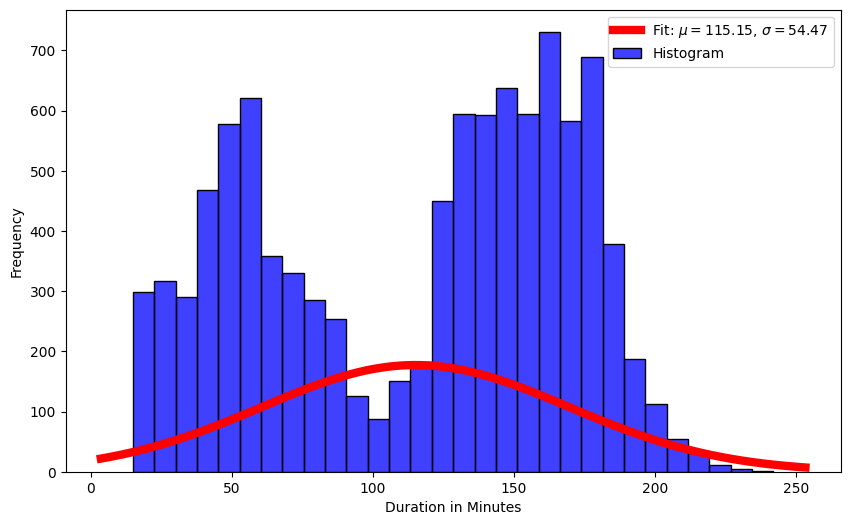

In [51]:
column_name = 'Duration in Minutes'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=False, color='blue', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(df[column_name])

# Plot the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
p=df[column_name].max()*p
plt.plot(x, 100*p, 'r', linewidth=6, label='Fit: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, std))




# Add labels and a legend
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.legend()

242

In [55]:
# Predict on the train set
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
rmse = sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Root Mean Squared Error on Training Set: {rmse}')


train_score = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_score)


Root Mean Squared Error on Training Set: 17.571340621695516
Train R^2 Score: 0.8955136567913045


In [56]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
rmse = sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Root Mean Squared Error on Validation Set: {rmse}')

val_score = r2_score(y_val, y_val_pred)
print("Validation R^2 Score:", val_score)

Root Mean Squared Error on Validation Set: 19.72821816870299
Validation R^2 Score: 0.8717966931770255


In [57]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Squared Error on Test Set: {rmse_test}')

test_score = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_score)

Root Mean Squared Error on Test Set: 19.38327405780967
Test R^2 Score: 0.8716792231936323


# Deep network design

In [58]:
X_train.head()

,Surgery Type,Anesthesia Type,Age
8588,-1.411920,-0.991371,0.456232
3178,-0.704722,-0.991371,0.656598
5200,0.709673,1.008705,-0.144864
8889,-0.704722,-0.991371,2.059157
5789,-1.411920,-0.991371,-2.749617


In [ ]:
X_train.shape

(6000, 3)

In [59]:
# Define the model
def get_simpleModel(shapein):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(shapein,), kernel_regularizer=l2(0.01)))
  model.add(layers.Dropout(0.3))  # Dropout for regularization
  model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
  model.add(layers.Dropout(0.3))  # Dropout for regularization
  model.add(layers.Dense(1, activation='linear', kernel_regularizer=l2(0.01)))  # Linear activation for regression

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [60]:
model = get_simpleModel(X_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
188/188 [==============================] - 2s 4ms/step - loss: 12098.8916 - val_loss: 4484.6318
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 2607.1982 - val_loss: 2239.5598
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 2489.1750 - val_loss: 2204.1475
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 2402.6804 - val_loss: 2159.6724
Epoch 5/50
188/188 [==============================] - 0s 3ms/step - loss: 2380.9546 - val_loss: 2119.6794
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 2329.2375 - val_loss: 2047.5254
Epoch 7/50
188/188 [==============================] - 0s 3ms/step - loss: 2249.3892 - val_loss: 1966.7205
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: 2164.9741 - val_loss: 1894.5195
Epoch 9/50
188/188 [==============================] - 1s 3ms/step - loss: 2096.5637 - val_loss: 1751.7938
Epoch 10/50
188/188 [========================

### estimate performance

In [62]:
# Evaluate the model on the train set
y_train_pred = model.predict(X_train).flatten()

# Calculate RMSE
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Root Mean Squared Error on Train Set: {rmse_train}')

train_score = r2_score(y_train, y_train_pred)
print("Train R^2 Score:", train_score)

188/188 [==============================] - 0s 1ms/step
Root Mean Squared Error on Train Set: 21.327930017354255
Train R^2 Score: 0.8460615359997896


In [63]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val).flatten()

# Calculate RMSE
rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

val_score = r2_score(y_val, y_val_pred)
print("Validation R^2 Score:", val_score)

63/63 [==============================] - 0s 1ms/step
Root Mean Squared Error on Validation Set: 22.318908939593687
Validation R^2 Score: 0.8359147950347419


In [64]:
# Evaluate the model on the test set
y_test_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Squared Error on Test Set: {rmse_test}')

test_score = r2_score(y_test, y_test_pred)
print("Test R^2 Score:", test_score)


63/63 [==============================] - 0s 1ms/step
Root Mean Squared Error on Test Set: 21.761435282395755
Test R^2 Score: 0.83825987309713


### Plot history

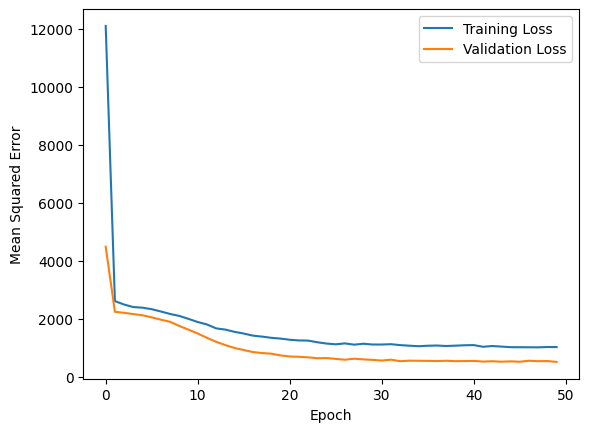

In [65]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

# Linear Regression

In [66]:
# Convert DataFrames to numpy arrays
X_train_array = np.array(X_train)
X_val_array = np.array(X_val)
X_test_array = np.array(X_test)

In [67]:
y_train_array = np.array(y_train)
y_val_array = np.array(y_val)
y_test_array = np.array(y_test)

In [68]:
X_train.shape

(6000, 3)

In [69]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_array, y_train_array)

LinearRegression()

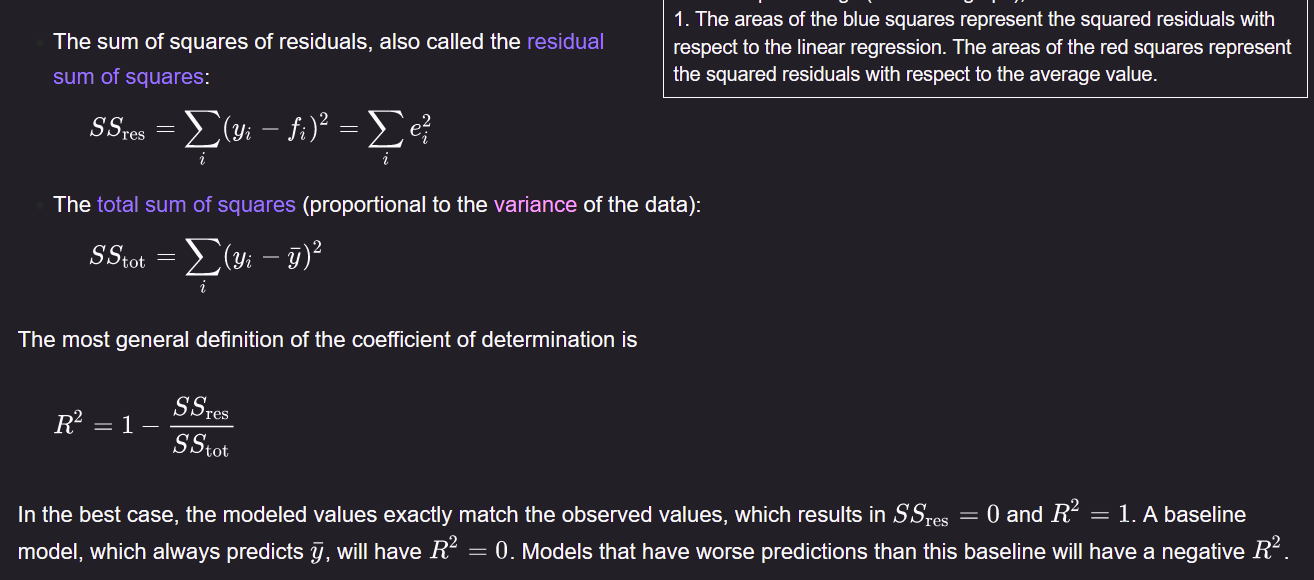

In [70]:
# Train performance the model
train_score = model.score(X_train_array, y_train_array)
y_train_pred = model.predict(X_train_array)
rmse = np.sqrt(mean_squared_error(y_train_array, y_train_pred))
print("Training R^2 Score:", train_score)
print("Training RMSE:", rmse)

Training R^2 Score: 0.2600047045941415
Training RMSE: 46.76162684644898


In [71]:
# Validate the model
val_score = model.score(X_val_array, y_val_array)
y_val_pred = model.predict(X_val_array)
rmse = np.sqrt(mean_squared_error(y_val_array, y_val_pred))
print("Validation R^2 Score:", val_score)
print("Validation RMSE:", rmse)

Validation R^2 Score: 0.2599507805201329
Validation RMSE: 47.39893141180658


In [72]:
# Test the model
test_score = model.score(X_test_array, y_test_array)
y_test_pred = model.predict(X_test_array)
rmse = np.sqrt(mean_squared_error(y_test_array, y_test_pred))
print("Test R^2 Score:", test_score)
print("Test RMSE:", rmse)

Test R^2 Score: 0.24948655007090592
Test RMSE: 46.87679230711327


# Non Linear Regression Random forest

In [73]:
# Create and train a random forest regressor model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train_array, y_train_array)

RandomForestRegressor(n_estimators=50, random_state=42)

In [74]:
# Train Performance the model
y_train_pred = model.predict(X_train_array)
train_score = r2_score(y_train_array, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train_array, y_train_pred))
print("Training R^2 Score:", train_score)
print("Training RMSE:", rmse)

Training R^2 Score: 0.8954342217627295
Training RMSE: 17.578018598545313


In [75]:
# Validate the model
y_val_pred = model.predict(X_val_array)
val_score = r2_score(y_val_array, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_array, y_val_pred))
print("Validation R^2 Score:", val_score)
print("Validation RMSE:", rmse)

Validation R^2 Score: 0.870642449874566
Validation RMSE: 19.81682797216884


In [76]:
# Test the model
y_test_pred = model.predict(X_test_array)
test_score = r2_score(y_test_array, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_array, y_test_pred))
print("Test R^2 Score:", test_score)
print("Test RMSE:", test_rmse)

Test R^2 Score: 0.8709656208102577
Test RMSE: 19.437095325264302


# Summary

i enjoyed the challange of surgery estimation whne started to look on data i realized immidiatly some columns like id is not so relevant to data analysis. this type of analysis can help in estimate duration and save money. i commion known models like xgboost, linear model and more. also i explored if i can use more sophisticated deep learning model , but finnaly managed to stay with my selection. additionaly select big model can lead to overfit with small amount of data. also i analyzed correlation matrix to see features importnace and depencies on target data. i added some statistical plot to understand data .

## Challanges



*   Select model
*   Select featurs
*   Featurs normalization
*   Model evaluation
*   Outliers (i didnt handle this issue)




## importance

* By correlation matrix seems Surgery Type is the most important feature.
* 'Anesthesia Type', 'Age' has low importance
*  'DoctorID', 'AnaesthetistID' ,'BMI' seems has almost zero correlation


## Metrics summery

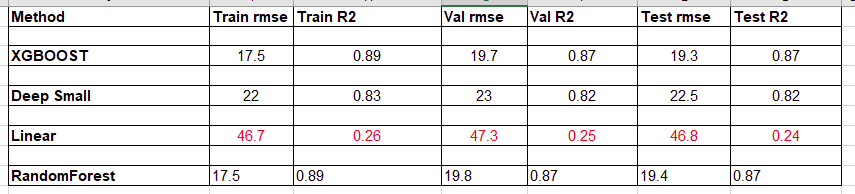

As can be seen the linear regression performance is not so good for all sets high mse and low R2, seems xgboost and random forest get best results form mse in test set 19 and r2 0.87 which is quite good.

## Additional talks

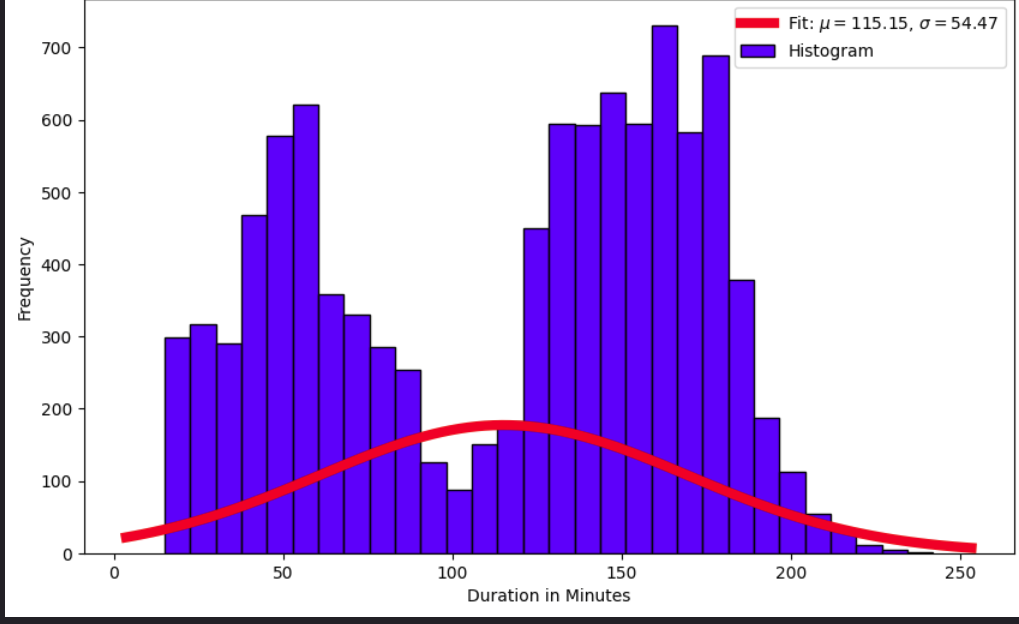

As can be seen from histogram of time data seems we have two distributions , we can split data use kmeans then use 2 calssifiers each for cluster , so process will be for train set cluster data use kmeans use time data and for each cluster has its own xgboost classifier, for test and validation we select to which cluster belongs then we activate the correct classifier this can improve .

# Appendix Kmeans

In [81]:
from sklearn.cluster import KMeans

In [82]:
np.random.seed(42)

In [80]:
y_train_array.shape

(6000,)

In [85]:
k_clusters = 2
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
clusters = kmeans.fit_predict(y_train_array.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
# Step 2: Split the training data based on the obtained clusters
x_train_clustered = [X_train_array[clusters == i] for i in range(k_clusters)]
y_train_clustered = [y_train_array[clusters == i] for i in range(k_clusters)]

In [99]:
#validation
predicted_clusters_val = kmeans.predict(y_val_array.reshape(-1, 1))

In [100]:
x_valid_clustered = [X_val_array[predicted_clusters_val == i] for i in range(k_clusters)]
y_valid_clustered = [y_val_array[predicted_clusters_val == i] for i in range(k_clusters)]

In [102]:
#test
predicted_clusters_test = kmeans.predict(y_test_array.reshape(-1, 1))

In [103]:
x_test_clustered = [X_test_array[predicted_clusters_test == i] for i in range(k_clusters)]
y_test_clustered = [y_test_array[predicted_clusters_test == i] for i in range(k_clusters)]

In [104]:
model1 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model2 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

In [105]:
model1.fit(x_train_clustered[0], y_train_clustered[0])
model2.fit(x_train_clustered[1], y_train_clustered[1])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [106]:
def getStatByModel(model,X,Y):
  # Predict
  y_pred = model.predict(X)

  # Evaluate the model on the  set
  rmse = sqrt(mean_squared_error(Y, y_pred))
  print(f'Root Mean Squared Error  Set: {rmse}')

  train_score = r2_score(Y, y_pred)
  print("Train R^2 Score:", train_score)

In [107]:
print('train evaluation cluster1')
getStatByModel(model1,x_train_clustered[0], y_train_clustered[0])

train evaluation cluster1
Root Mean Squared Error  Set: 13.660822137014291
Train R^2 Score: 0.5657770949284944


In [110]:
print('train evaluation cluster2')
getStatByModel(model2,x_train_clustered[1], y_train_clustered[1])

train evaluation cluster2
Root Mean Squared Error  Set: 19.51370250013841
Train R^2 Score: 0.2812640876896688


In [112]:
print('validation evaluation cluster1')
getStatByModel(model1,x_valid_clustered[0], y_valid_clustered[0])

validation evaluation cluster1
Root Mean Squared Error  Set: 15.56336768633402
Train R^2 Score: 0.45487678382793706


In [113]:
print('validation evaluation cluster2')
getStatByModel(model2,x_valid_clustered[1], y_valid_clustered[1])

validation evaluation cluster2
Root Mean Squared Error  Set: 22.05482677639224
Train R^2 Score: 0.1032241956073745


In [114]:
print('test evaluation cluster1')
getStatByModel(model1,x_test_clustered[0], y_test_clustered[0])

test evaluation cluster1
Root Mean Squared Error  Set: 14.96907321010282
Train R^2 Score: 0.5373585717193909


In [115]:
print('test evaluation cluster2')
getStatByModel(model2,x_test_clustered[1], y_test_clustered[1])

test evaluation cluster2
Root Mean Squared Error  Set: 21.446290709209546
Train R^2 Score: 0.14658852813911016


#Note

A can be seen on test set we reach mse error 14 and 21( ~ tatal data 18) vs original 19 mse a little improvment while r2 score decrease to 0.53 and 0.14 vs original xgboost   was 0.87 , so this issue need more exploration